# H0 = network latency has not changed
# Ha = network latency went up
-- true positive would be that latency went up and we rejected the null
-- type 1 error would be that we rejected the null when latency did not change

-- true negative would be that we fail to reject the null and latency didnt change
-- type 2 error would be that we fail to reject null and the latency went up


# H0 = the website design is neutral
# Ha = the website design is good
-- true positive would be that website is good and we rejected the null
-- type 1 error would be that we rejected the null when website is neutral

-- true negative would be that we fail to reject the null and website is neutral
-- type 2 error would be that we fail to reject null and website is good


# H0 = television ad is not affecting sales
# Ha = television ad is driving revenue
-- true positive would be that television ads are driving revenue and we rejected the null
-- type 1 error would be that we rejected the null when television ads did not affect revenue

-- true negative would be that we fail to reject the null and television ads did not affect revenue
-- type 2 error would be that we fail to reject null and television ads affected revenue 


## Central limit theorem
- a population that is not necessarily normally distributed
- taking samples will result in normally distributed

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)

In [2]:
# Define a roll [1,2,3,4,5,6]
n_dice_per_experiment = ncols = 10
n_experiment = nrows = 100

#100 rows and 10 columns, from numbers 1-6
data = np.random.randint(1, 7, (nrows, ncols))

#this gives number of columns in data array
data [:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [3]:
#take the mean of each row:
calculated_mean_of_rows = data.mean(axis = 1)
calculated_mean_of_rows

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0, 0.5, 'Number of Outcomes')

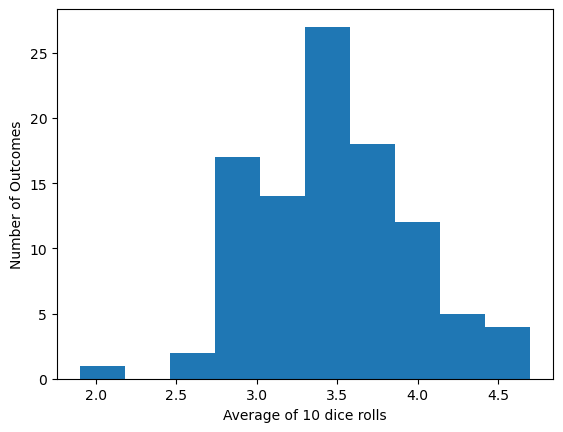

In [4]:
plt.hist(calculated_mean_of_rows)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('Number of Outcomes')

## One sample T-test
1. Plot distributions
2. Establish hypothesis

In [5]:
import env

In [6]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
query = 'select * from customers'



In [7]:
df = pd.read_sql(query, url)

In [8]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [9]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

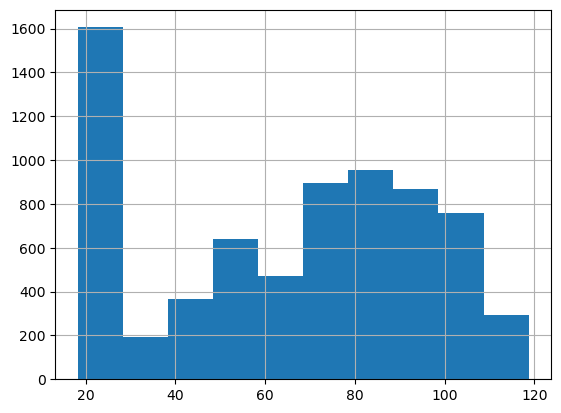

In [10]:
df.monthly_charges.hist()

<AxesSubplot:>

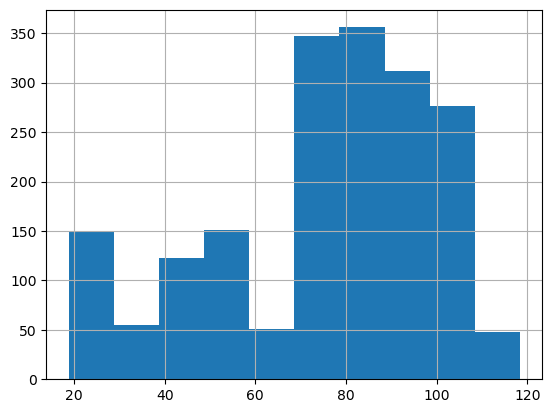

In [11]:
# give us a df that filters churn column for yes
churn_sample = df[df.churn == 'Yes'].monthly_charges
churn_sample.hist()

In [12]:
churn_sample

2       73.90
3       98.00
4       83.90
18      62.70
19      25.10
        ...  
7020    96.80
7023    83.85
7036    70.15
7037    20.95
7039    85.10
Name: monthly_charges, Length: 1869, dtype: float64

## set hypothesis
H_0: mean of monthly charged of churned customers <= mean of 
    monthly charges of all customers

H_a: mean of monthly charges of chruned customers > mean of 
    monthly charges of all customers
    
alpha value = 0.05
    
        
        

In [13]:
#sample size:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [14]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [15]:
churn_sample = df[df.churn == 'Yes'].monthly_charges
## filters df to only show rows that have yes for churn, 
## then the .monthly_charges shows only the monthly_charges column

In [16]:
overall_mean = df.monthly_charges.mean()

In [17]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
alpha = .05
print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


In [18]:
if p/2 > alpha:
    print("We fail to reject null hypothesis")

elif t < 0:
    print("We fail to reject $H_{0}$")

else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [19]:
dfflowers = sns.load_dataset('iris')
dfflowers.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [20]:
dfflowers.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [21]:
versicolor_sepal_length = dfflowers[dfflowers.species == 'versicolor'].sepal_length
virginica_sepal_length = dfflowers[dfflowers.species == 'virginica'].sepal_length
setosa_sepal_length = dfflowers[dfflowers.species == 'setosa'].sepal_length

<AxesSubplot:>

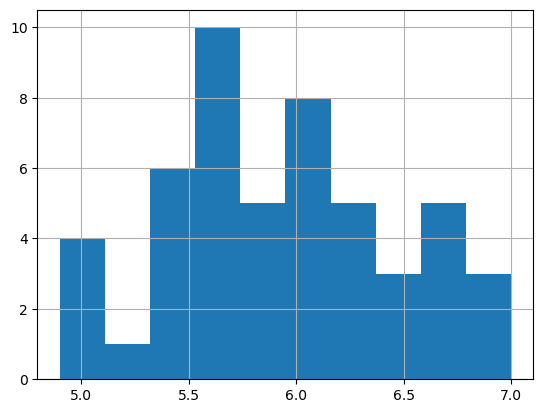

In [22]:
versicolor_sepal_length.hist()

<AxesSubplot:>

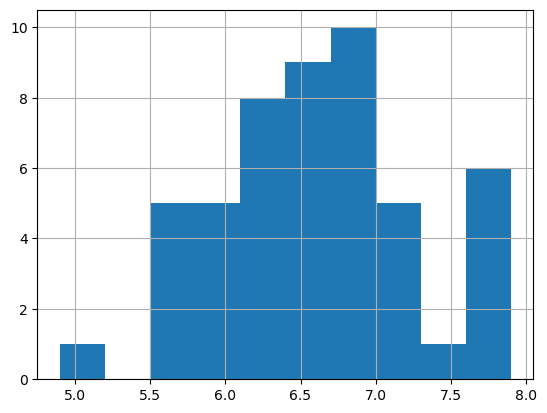

In [23]:
virginica_sepal_length.hist()

<AxesSubplot:>

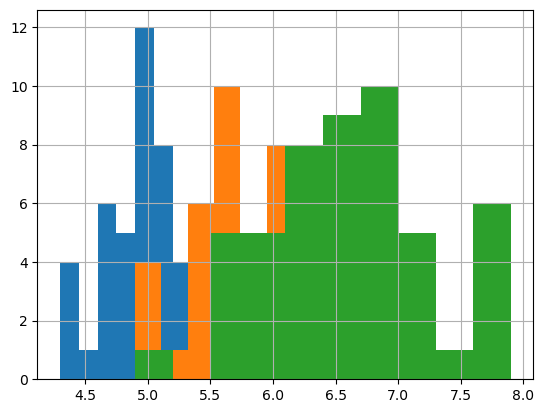

In [24]:
setosa_sepal_length.hist()
versicolor_sepal_length.hist()
virginica_sepal_length.hist()

In [25]:
stats.levene(versicolor_sepal_length, virginica_sepal_length,\
            setosa_sepal_length)

LeveneResult(statistic=6.352720020482689, pvalue=0.0022585277836218586)

In [26]:
import seaborn as sns
mpg = sns.load_dataset('mpg')

In [27]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
mpg = mpg[~mpg.horsepower.isna()]

In [29]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [30]:
mpg.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [31]:
USA = mpg[mpg['origin'] == 'usa'].horsepower
japan = mpg[mpg['origin'] == 'japan'].horsepower
europe = mpg[mpg['origin'] == 'europe'].horsepower

Is the horsepower of vehicles different across the distint origins of the vehicles?
$H_{0}$: mean_horsepower_USA == mean_horsepower_japan == mean_horsepower_europe

$H_{a}$: mean horsepowers from at least 2 countries are significantly different

Assumptions:
1. At least 30 observations: met (see value counts above)

2. groups are independent

3. equal population variance

In [32]:
stats.levene(USA, \
             japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

 the low p value means that the variances are signifigantly different
 from eachother and therefor cannot use ANOVA test
 
 use Kruskal-Wallis

In [33]:
t, p = stats.kruskal(USA, japan, europe)

In [34]:
p

1.1759521262123952e-23

with a p-value < 0.05, we can say there is a signifigant difference
between the horsepower of all the vehicles made in the countries

In [35]:
t, p = stats.ttest_ind(japan, europe, equal_var = False)

In [36]:
p

0.8193616065509621

Exercises

Answer with the type of test you would use (assume normal distribution):

1. Is there a difference in grades of students on the second floor compared to grades of all students?
        Ue a One sampe t-test


2. Are adults who drink milk taller than adults who dont drink milk?
        Independent t-test or 2-sample t-test

3. Is the the price of gas higher in texas or in new mexico?
        Independent t-test

4. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
        ANOVA test

Load the mpg dataset and use it to answer the following questions:

1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


2. Are compact cars more fuel-efficient than the average car?


3. Do manual cars get better gas mileage than automatic cars?

In [37]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [38]:
mpg = sns.load_dataset('mpg')

In [39]:
from pydataset import data

In [40]:
mpg = data('mpg')

In [41]:
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [42]:
mpg['avg_fuel_eff'] = (mpg.cty + mpg.hwy) / 2

In [43]:
y2008 = mpg[mpg['year'] == 2008].avg_fuel_eff
y1999 = mpg[mpg['year'] == 1999].avg_fuel_eff

<AxesSubplot:>

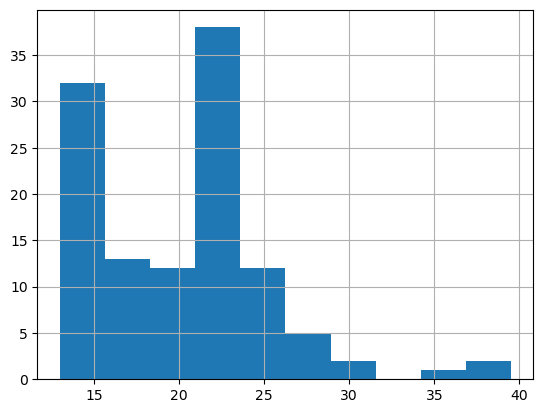

In [44]:
y1999.hist()

In [45]:
t, p = stats.wilcoxon(y1999, y2008)

In [46]:
p

0.9096958349129208

no, there is no difference between fuel efficeinty of cars
vs 1999 and 2008

In [47]:
compact = mpg[mpg['class'] == 'compact'].avg_fuel_eff
overall_mean = mpg.avg_fuel_eff.mean()

In [48]:
stats.ttest_1samp(compact, overall_mean)

Ttest_1sampResult(statistic=7.896888573132533, pvalue=4.198563794317163e-10)

yes, there is a signifigant difference between compact car and overall mean

In [49]:
manual = mpg[mpg['trans'].str.startswith('m')].avg_fuel_eff
auto = mpg[mpg['trans'].str.startswith('a')].avg_fuel_eff

In [50]:
stats.ttest_ind(manual, auto, equal_var = False)

Ttest_indResult(statistic=4.443514012903072, pvalue=1.7952248999917893e-05)

 yes, there is a signifigant differene between manual and automatic 
 transmission cars


# question 2

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [65]:
office1 = np.random.normal(90, 15, size = 40)
office2 = np.random.normal(100, 20, size = 50)

In [70]:
t, p = stats.ttest_ind(office1, office2, equal_var = False)

In [71]:
t

-2.853649535755713

In [72]:
p

0.005398891372080552